In [23]:
#-*- encoding:utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 解决中文乱码
import matplotlib.font_manager as fm
chinesefont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')


In [2]:
names = ["addr", "build_face", "district", "floor_position","living_room_num","name","price","price_unit", "room_num","size","total_floor","town","year","unused" ]
props = pd.read_csv("props.csv", index_col=False, names=names)
props

,addr,build_face,district,floor_position,living_room_num,name,price,price_unit,room_num,size,total_floor,town,year,unused
0,绿城上海御园,南,浦东,中,4,稀罕南北通，出行方便，光线充足，品味装修,1460,万,2,182.90,7,金桥,None,NaN
1,保屯路50弄,南,黄浦,高,2,稀罕南北通，厨卫全明，交通方便，采光好,395,万,1,47.97,6,蓬莱公园,1978,NaN
2,古北国际花园,南,长宁,中,3,稀罕南北通，卧室带阳台，地铁沿线，好楼层,1750,万,2,163.85,30,古北,2006,NaN
3,龙柏二村,南,闵行,高,3,稀缺南北通，厨卫全明，出行方便，采光好,420,万,1,82.33,6,龙柏,1994,NaN
4,和新小区,南,闸北,中,1,厨卫全明，卧室带阳台，地铁房，黄金楼层,215,万,1,40.58,6,彭浦,1999,NaN
5,长江公寓,南,黄浦,中,1,地铁直达，楼层好，品质装修，房本满五年,590,万,1,51.00,14,人民广场,1939,NaN
6,瑞嘉苑,南,虹口,低,3,南北户型，卧室带卫，出行方便，上下楼方便,1200,万,2,143.74,29,临平路,2004,NaN
7,宝林一村,南,宝山,中,2,南北通透，出行方便，楼层好，中等装修,267,万,1,53.97,6,淞宝,1992,NaN
8,静安新城（四区）,南,闵行,低,2,房型正气，厨卫全明，交通方便，上下楼方便,375,万,1,64.32,6,静安新城,1998,NaN
9,名嘉新苑,南,浦东,中,3,稀罕南北通，交通便利，光线充足，精装修,780,万,2,125.57,18,三林,2007,NaN


In [3]:
## 按照行政区分类，显示行政区房价（平均数，最高，最低）
## 研究影响房价的因素，比如 位置，楼层，朝向，面积，房间数和单价的关系

In [99]:
districts_props = props[["district","town", "price","size"]]
districts_props

,district,town,price,size
0,浦东,金桥,1460,182.90
1,黄浦,蓬莱公园,395,47.97
2,长宁,古北,1750,163.85
3,闵行,龙柏,420,82.33
4,闸北,彭浦,215,40.58
5,黄浦,人民广场,590,51.00
6,虹口,临平路,1200,143.74
7,宝山,淞宝,267,53.97
8,闵行,静安新城,375,64.32
9,浦东,三林,780,125.57


In [5]:
districts_props_num = districts_props["district"].value_counts()
districts_props_num


浦东    683
闵行    370
徐汇    286
杨浦    263
宝山    259
长宁    227
普陀    219
闸北    169
黄浦    135
虹口    114
松江     92
静安     83
嘉定     70
青浦     17
奉贤     13
Name: district, dtype: int64

In [6]:
districts_props["unit_price"] = districts_props["price"] / districts_props["size"]
districts_props = districts_props[["district", "price","size", "unit_price"]]
districts_props

C:\Users\Fan.Yang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,district,price,size,unit_price
0,浦东,1460,182.90,7.982504
1,黄浦,395,47.97,8.234313
2,长宁,1750,163.85,10.680500
3,闵行,420,82.33,5.101421
4,闸北,215,40.58,5.298176
5,黄浦,590,51.00,11.568627
6,虹口,1200,143.74,8.348407
7,宝山,267,53.97,4.947193
8,闵行,375,64.32,5.830224
9,浦东,780,125.57,6.211675


In [31]:
districts_props_avg_price = districts_props.groupby(["district"], as_index=True).mean()
districts_props_avg_price = districts_props_avg_price.sort_values(by="unit_price", ascending=False)
districts_props_avg_price

,price,size,unit_price
district,,,
静安,864.096386,89.921084,9.727188
黄浦,985.903704,102.210444,9.332673
徐汇,699.961538,84.971748,7.924589
长宁,689.704846,90.251674,7.510776
虹口,643.570175,83.570351,7.449479
普陀,611.922374,86.550548,6.821842
闸北,563.207101,81.247574,6.803661
杨浦,528.870722,76.654943,6.659444
浦东,600.118594,89.710630,6.545855


In [84]:
### 画出行政区和房价关系的折线图
districts_props_avg_price_unit = districts_props_avg_price["unit_price"].reset_index()
## 修改为unicode(utf-8实现)
labels = [unicode(item,'utf-8') for item in districts_props_avg_price_unit["district"].values ] 
districts_props_avg_price_unit['district'] = labels
districts_props_avg_price_unit

,district,unit_price
0,静安,9.727188
1,黄浦,9.332673
2,徐汇,7.924589
3,长宁,7.510776
4,虹口,7.449479
5,普陀,6.821842
6,闸北,6.803661
7,杨浦,6.659444
8,浦东,6.545855
9,闵行,5.561532


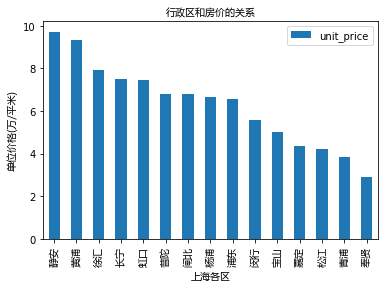

In [98]:
## MDZZ 的python 中文处理...
## 画出柱状图
ax= districts_props_avg_price_unit.plot(kind="bar", x="district", y="unit_price")
ax.set_xticklabels(districts_props_avg_price_unit["district"].values, fontproperties=chinesefont)
plt.title(u"行政区和房价的关系", fontproperties=chinesefont)
plt.xlabel(u"上海各区", fontproperties=chinesefont)
plt.ylabel(u"单位价格(万/平米)", fontproperties=chinesefont)
plt.show()

In [101]:
#dist_town = districts_props.groupby(["district","town"])
districts_props["unitp"] = districts_props["price"] / districts_props["size"]

C:\Users\Fan.Yang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
dist_town = districts_props.groupby(["district","town"]).mean().reset_index()
dist_town_ordered = dist_town.sort_values(by="unitp", ascending=False).reset_index()
dist_town_ordered


,index,district,town,price,size,unitp
0,30,徐汇,建国西路,2529.200000,182.516000,11.618319
1,147,黄浦,新天地,1837.272727,157.307273,11.447902
2,138,静安,南京西路,1130.000000,101.506111,10.999670
3,37,徐汇,衡山路,824.166667,81.017500,10.694140
4,145,黄浦,南京东路,662.000000,66.505000,10.064075
5,148,黄浦,淮海中路,753.000000,73.470000,9.971601
6,140,静安,江宁路,824.545455,81.720000,9.637286
7,144,黄浦,人民广场,1072.500000,112.922500,9.551110
8,142,黄浦,世博滨江,994.272727,101.158182,9.506222
9,139,静安,曹家渡,840.833333,93.084722,9.493892


In [109]:
#dist_town_ordered.to_csv("dist_town_ordered.csv", encoding="utf-8")
towns = [unicode(item,"utf-8") for item in dist_town_ordered["town"]]
districts = [unicode(item,"utf-8") for item in dist_town_ordered["district"]]
dist_town_ordered["town"] = towns
dist_town_ordered["district"] = districts
dist_town_ordered.to_csv("dist_town_ordered.csv", encoding="utf-8")

In [113]:
## 筛选出浦东的情况
ss = dist_town_ordered[dist_town_ordered["district"]==u'浦东'].reset_index()
ss

,index,district,town,price,size,unitp
0,87,浦东,联洋,1162.222222,125.102222,9.409471
1,86,浦东,碧云,1490.000000,153.010000,9.298364
2,85,浦东,潍坊,412.090909,46.567273,9.245346
3,92,浦东,陆家嘴,1112.604651,117.284186,9.061583
4,84,浦东,源深,993.920000,112.558000,8.857555
5,81,浦东,杨东,1159.375000,136.507500,8.460441
6,89,浦东,花木,706.055556,85.611667,8.046748
7,83,浦东,洋泾,517.687500,67.959688,7.560560
8,72,浦东,塘桥,813.620690,114.749655,7.072840
9,68,浦东,北蔡,526.857143,79.334000,6.637826
